In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
df = pd.read_csv("Kepler_objects.csv", comment="#")


In [3]:
df.replace("NULL", np.nan, inplace=True)
df = df.dropna(subset=["koi_disposition", "koi_prad", "koi_period", "koi_steff"])

# --- 1. Disposition balance ---

C:\Users\saqib\AppData\Local\Temp\ipykernel_18880\3254376434.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="koi_disposition", data=df, palette="Set2")


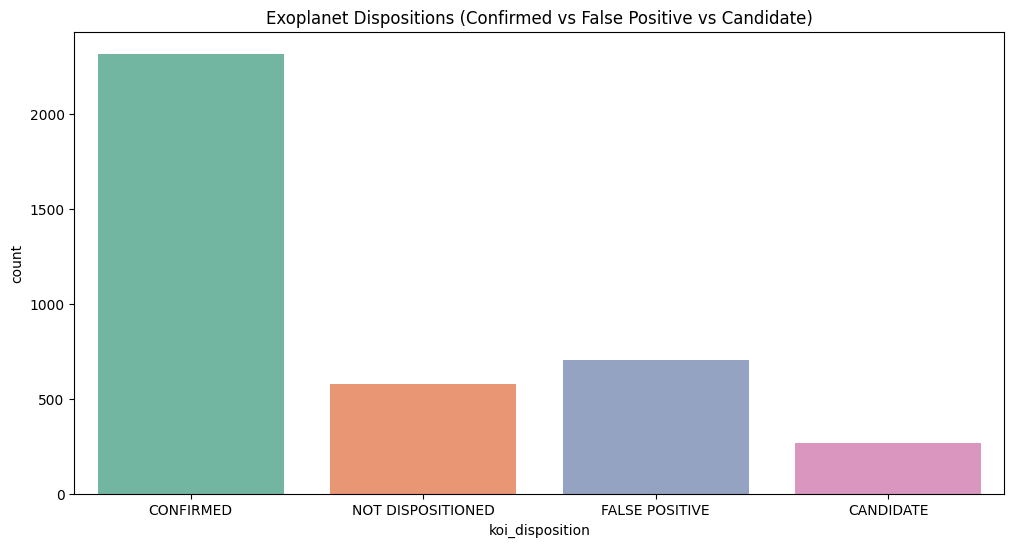

In [6]:
plt.figure(figsize=(12,6))
sns.countplot(x="koi_disposition", data=df, palette="Set2")
plt.title("Exoplanet Dispositions (Confirmed vs False Positive vs Candidate)")
plt.show()


# Planet radius distribution

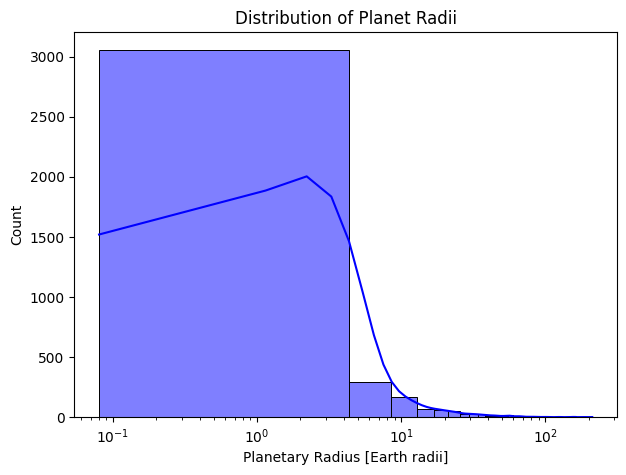

In [7]:
plt.figure(figsize=(7,5))
sns.histplot(df["koi_prad"], bins=50, color="blue", kde=True)
plt.xlabel("Planetary Radius [Earth radii]")
plt.title("Distribution of Planet Radii")
plt.xscale("log")
plt.show()

# Radius vs Period scatter

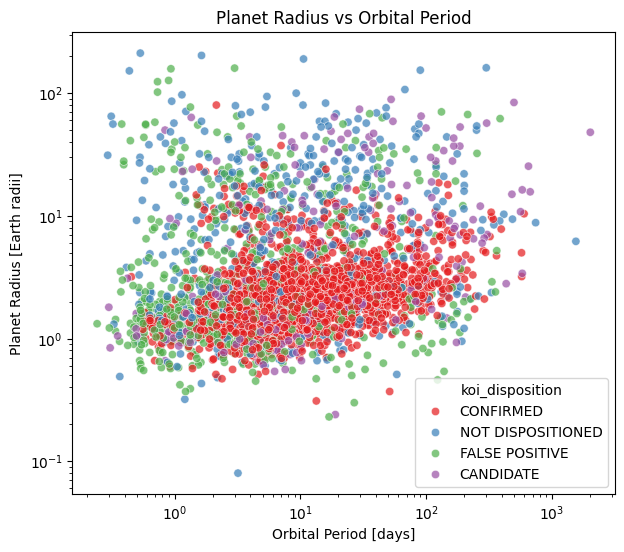

In [8]:
plt.figure(figsize=(7,6))
sns.scatterplot(x="koi_period", y="koi_prad", hue="koi_disposition",
                data=df, alpha=0.7, palette="Set1")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Orbital Period [days]")
plt.ylabel("Planet Radius [Earth radii]")
plt.title("Planet Radius vs Orbital Period")
plt.show()

# Equilibrium Temperature

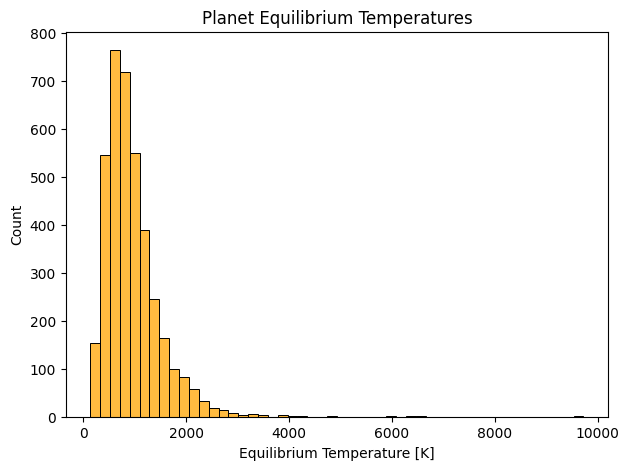

In [9]:
plt.figure(figsize=(7,5))
sns.histplot(df["koi_teq"], bins=50, color="orange")
plt.xlabel("Equilibrium Temperature [K]")
plt.title("Planet Equilibrium Temperatures")
plt.show()

# Stellar Temperature distribution 

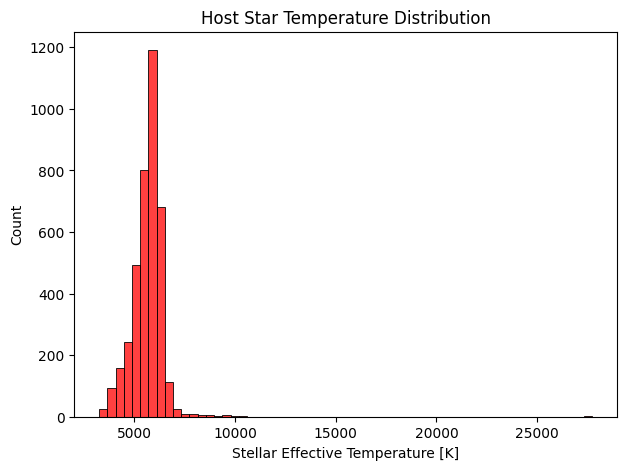

In [10]:
plt.figure(figsize=(7,5))
sns.histplot(df["koi_steff"], bins=60, color="red")
plt.xlabel("Stellar Effective Temperature [K]")
plt.title("Host Star Temperature Distribution")
plt.show()


# Correlation heatmap 

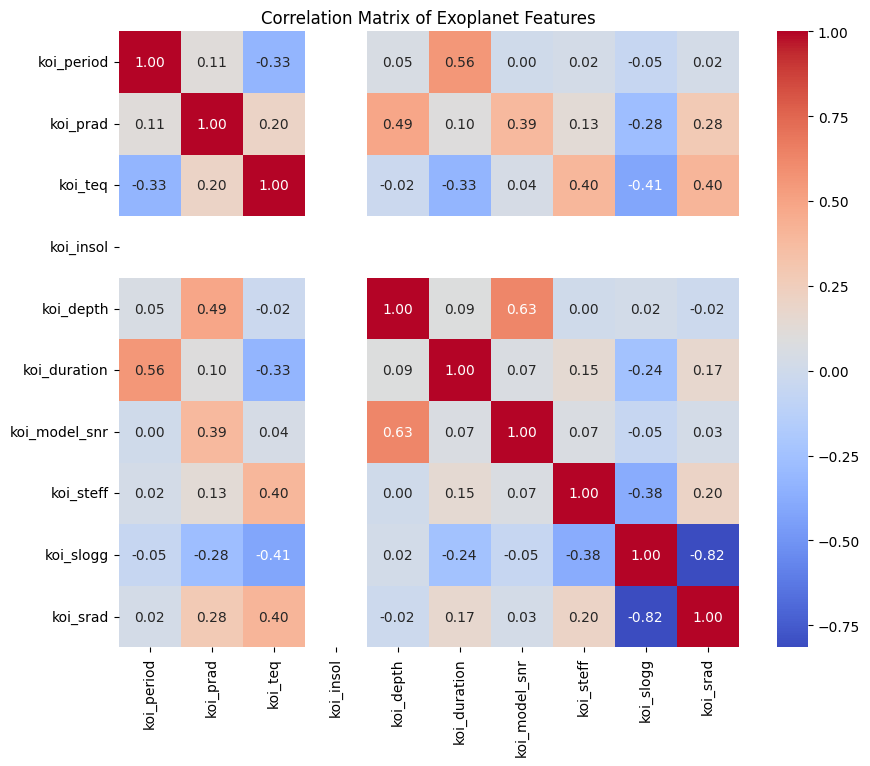

In [11]:
num_cols = ["koi_period","koi_prad","koi_teq","koi_insol","koi_depth",
            "koi_duration","koi_model_snr","koi_steff","koi_slogg","koi_srad"]
corr = df[num_cols].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Exoplanet Features")
plt.show()